In [1]:

# Standard library imports
import os
import sys
import logging

# Third-party imports
import pandas as pd

import seaborn as sns
import scipy

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Local module imports
sys.path.append(os.path.abspath('..'))
from utils.utils_constants import (VESSEL_NEPTUNE_PAT_INFO_W_SCORE_PATH as  VESSEL_PAT_INFO_W_SCORE_PATH,
                                   VESSEL_NEPTUNE_PAT_INFO_W_SCORE_W_FEATURE_PATH as  VESSEL_PAT_INFO_W_SCORE_W_FEATURE_PATH,
                                   DISEASE_TYPES, ARTERY_TYPES, FEATURES_PATH)


# Logging configuration
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
mlogger = logging.getLogger('matplotlib')
mlogger.setLevel(logging.WARNING)

In [ ]:
pat_df = pd.read_csv(VESSEL_PAT_INFO_W_SCORE_PATH)
print("Number of Samples:", len(pat_df))

DEMOGRAPHICS = ['PAT_Sex', 'PAT_Race', 'PAT_Hispanic', 'PAT_AgeV3']
CLININCAL_DATA = ['PAT_Cohort', 'eGFRatBx', 'UPCRatBx']
pat_df.dropna(subset = DEMOGRAPHICS + CLININCAL_DATA, inplace=True)
print("Number of Samples:", len(pat_df))

pat_df = pat_df[pat_df["Num_All_Arteries"] > 0]
print("Number of Samples:", len(pat_df))

# pat_df.dropna(subset = DEMOGRAPHICS + CLININCAL_DATA, inplace=True)
selected_slide_basenames = [os.path.splitext(x)[0] for x in pat_df["WSI_Selected"].values]

Number of Samples: 247
Number of Samples: 243
Number of Samples: 225


In [3]:
base_feature_names = [
'Log Artery Area', 'Media Area Ratio', 'Intima Area Ratio', 'Lumen Area Ratio',
]

measurement_feature_names = [
                 'Intima Average', 'Intima Median', 'Intima Peak Height', 'Intima Peak Prominence',
                 'Media Average',  'Media Median', 'Media Peak Height',  'Media Peak Prominence',  
                 'Ratio Average',  'Ratio Median', 'Ratio Peak Height', 'Ratio Peak Prominence']


# measurement_feature_names = [
#                  'Intima Average',  'Intima Peak Height',
#                  'Media Average',  'Media Peak Height', 
#                  'Ratio Average',   'Ratio Peak Height']

hya_feature_name = 'Hyalinosis Area Ratio'

In [4]:
def violin_plots(df, feature_name, severity_type, ax, artery_type):
    features = df.loc[:, feature_name]
    scores = df.loc[:, f'{severity_type} Severity']
    rho, p_val = scipy.stats.pearsonr(features, scores)
    p_str = f" p<0.001" if p_val < 0.001 else f" p={p_val:.3f}"

    sns.violinplot(x=f'{severity_type} Severity', y=feature_name, data=df, ax=ax)
    if "Ratio" in feature_name: 
        feature_name = feature_name.replace("Ratio ", "Intima-Media Ratio ")
    ax.set_xticks([0, 1, 2, 3], [0, 1, 2, 3], fontsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlabel(f'{severity_type} Severity', fontsize=20)
    ax.set_ylabel(f"Feature Value", fontsize=20)
    ax.set_title(feature_name + "\n" + r"$\rho$" + "={:.2f}".format(rho) + "," + p_str,
                        y=-0.28,pad=-37, fontsize=20)
    # ax.set_title(artery_type + "\n" + r"$\rho$" + "={:.2f}".format(rho) + "," + p_str,
    #                     y=-0.28,pad=-37, fontsize=20)    

In [ ]:
suffix = "_measurements_exclude_hya_manual"
collected_features = pd.read_csv(FEATURES_PATH.replace(".xlsx", f"{suffix}.csv"))
print(collected_features.shape)
collected_features = collected_features[collected_features["Artery Type"] != "Others"]
print(collected_features.shape)
collected_features = collected_features.loc[collected_features.loc[:, "Slide Name"].isin(selected_slide_basenames), :]
print(collected_features.shape)

(2944, 35)
(2335, 35)
(2316, 35)


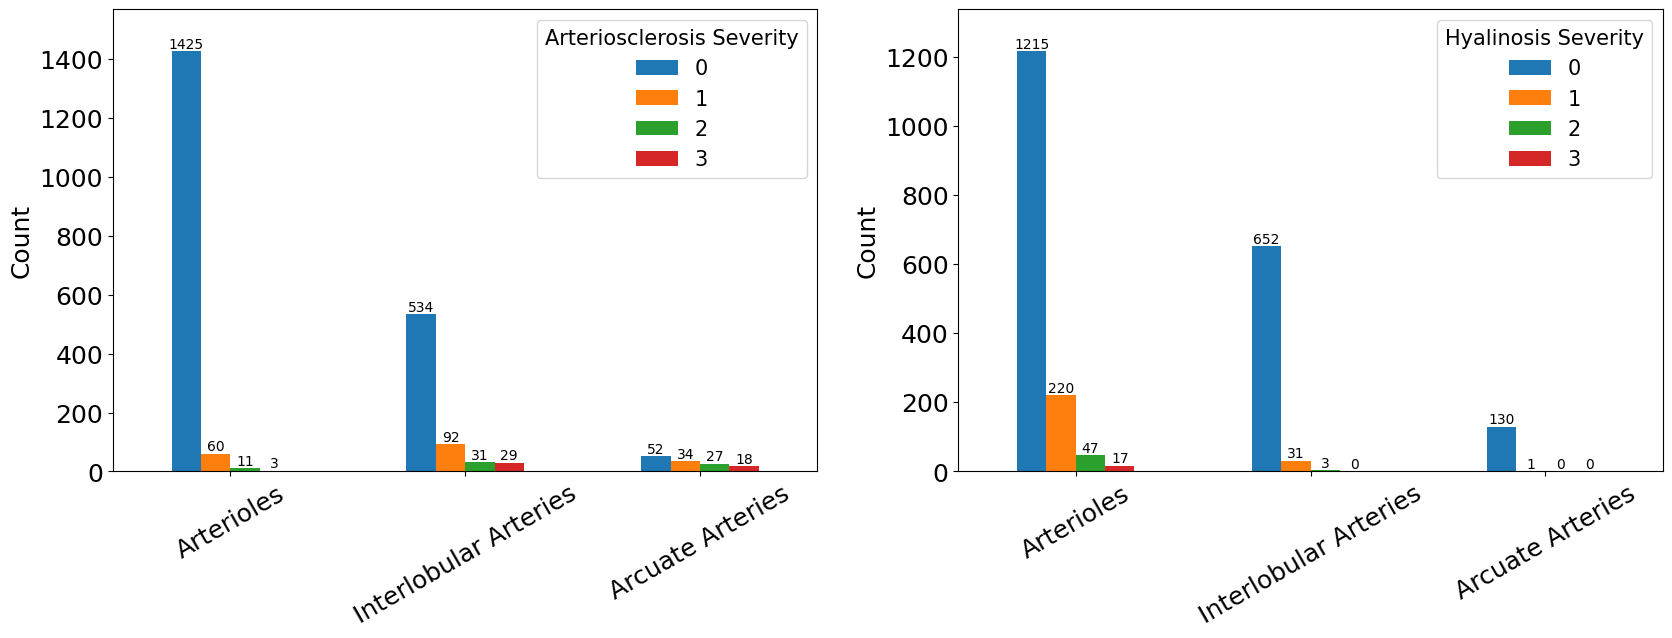

,Slide Name,Image Name,Artery ID,Bounding Box,Artery Type,Arteriosclerosis Severity,Hyalinosis Severity,Artery Area,Log Artery Area,Media Area Ratio,...,Media Variance,Vis Media Peak Indice,Media Peak Height,Media Peak Prominence,Ratio Average,Ratio Median,Ratio Variance,Vis Ratio Peak Indice,Ratio Peak Height,Ratio Peak Prominence
0,10_26609_000_002_L2_TRI,Biopsy_001_WSI_001_A01_87467_29252_539_387.png,A01,"87467, 29252, 539, 387",Interlobular Arteries,0,0,61749.0,11.030833,0.447457,...,0.001232,306.0,0.268764,0.101510,0.244531,0.233086,0.003766,232.0,0.397297,0.397297
1,10_26609_000_002_L2_TRI,Biopsy_001_WSI_001_A02_86515_28505_861_584.png,A02,"86515, 28505, 861, 584",Interlobular Arteries,0,0,100195.5,11.514879,0.761891,...,0.003124,226.0,0.372943,0.296969,0.290994,0.301833,0.009101,302.0,0.430258,0.351727
2,10_26609_000_002_L2_TRI,Biopsy_001_WSI_001_A04_83812_19882_846_1293.png,A04,"83812, 19882, 846, 1293",Interlobular Arteries,0,0,282556.5,12.551634,0.561021,...,0.000590,294.0,0.165494,0.092851,0.388217,0.366463,0.008262,282.0,0.617519,0.479648
3,10_26609_000_002_L2_TRI,Biopsy_001_WSI_001_A05_85633_16311_186_182.png,A05,"85633, 16311, 186, 182",Arterioles,0,0,15934.5,9.676242,0.646114,...,0.003271,127.0,0.385167,0.240482,0.303977,0.279259,0.011658,249.0,0.546768,0.317191
4,10_26609_000_002_L2_TRI,Biopsy_001_WSI_001_A06_83026_12349_173_255.png,A06,"83026, 12349, 173, 255",Arterioles,0,0,21118.0,9.957881,0.575528,...,0.002272,111.0,0.326555,0.212760,0.378544,0.380763,0.011444,77.0,0.584382,0.349198


In [6]:
collected_features['Artery Type'] = pd.Categorical(collected_features['Artery Type'], categories=ARTERY_TYPES)

def barplot(counts, col, ax):
    # Plotting directly on the provided axis
    counts.plot(kind='bar', ax=ax, legend=True)
    # ax.set_title(f'Distribution of {col} by Artery Type', fontsize=20)
    ax.set_ylabel('Count', fontsize=18)
    ax.set_xlabel('')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=18)
    ax.tick_params(axis='y', labelsize=18)

    # Legend configuration
    ax.legend(title=col, fontsize=15, title_fontsize=15)

    # Annotating bars with their heights
    max_height = max(counts.max())
    ax.set_ylim(0, max_height * 1.1)  # Scale y-axis to fit annotations
    for p in ax.patches:
        ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
        
# Create a figure with subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))

for i, disease_type in enumerate(DISEASE_TYPES):
    # Calculate counts
    severity_counts = collected_features.groupby(['Artery Type', f'{disease_type} Severity'],
                                                 observed=False).size().unstack(fill_value=0)
    # Create the bar plot on the specified subplot
    barplot(severity_counts, f'{disease_type} Severity', axs[i])

plt.show()
collected_features.head()

Arterioles
(1499, 35)
(1481, 35)
Features sorted by importance:
Intima Area Ratio: 0.246
Log Artery Area: 0.185
Lumen Area Ratio: 0.129
Intima Median: 0.104
Media Average: 0.062


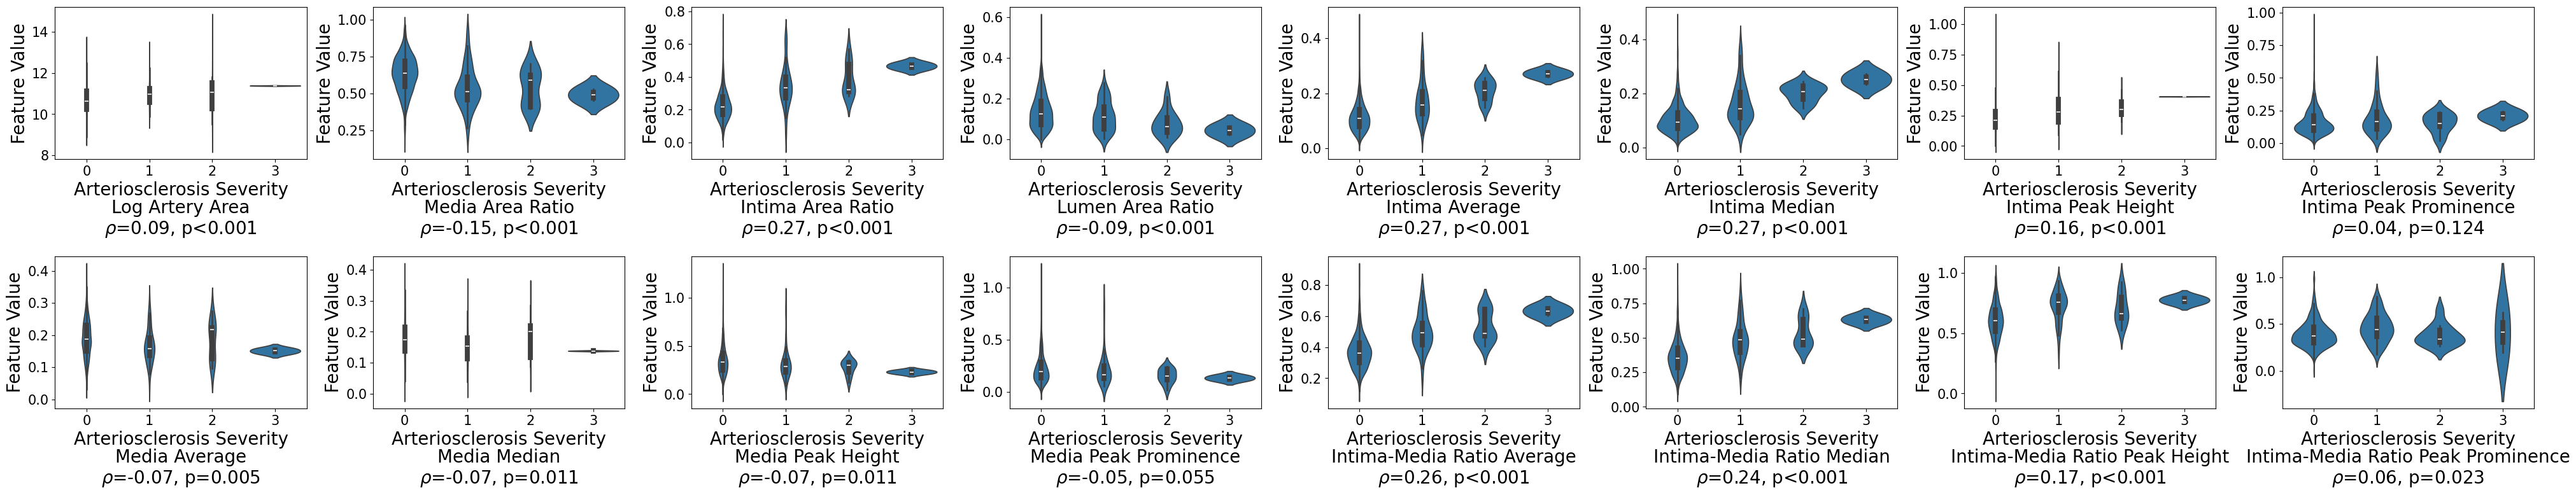

Interlobular Arteries
(686, 35)
(684, 35)
Features sorted by importance:
Ratio Average: 0.461
Intima Area Ratio: 0.212
Log Artery Area: 0.097
Media Median: 0.053
Media Average: 0.049


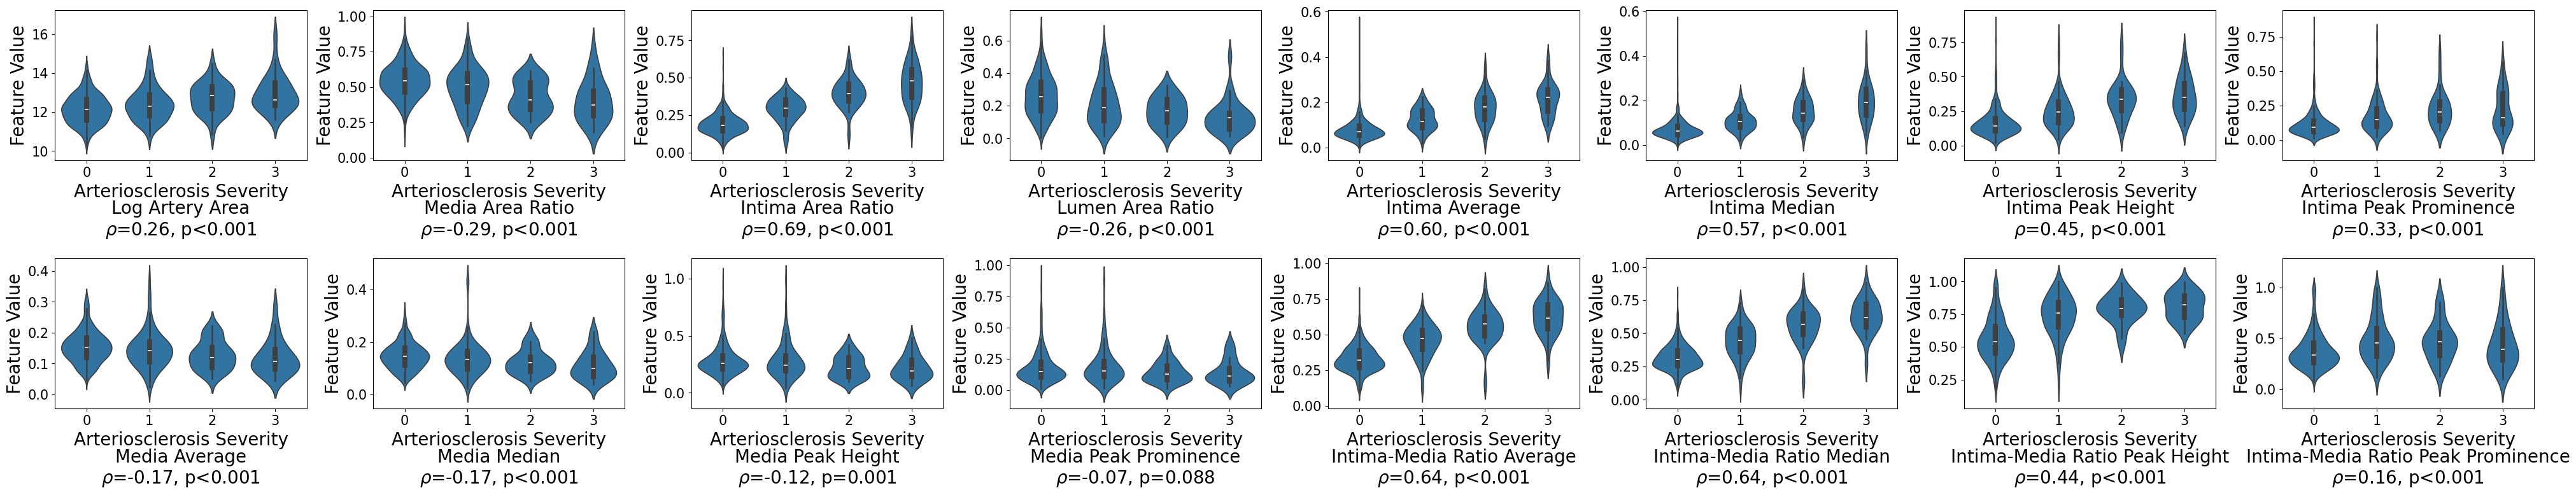

Arcuate Arteries
(131, 35)
(131, 35)
Features sorted by importance:
Intima Area Ratio: 0.309
Ratio Median: 0.207
Ratio Peak Prominence: 0.094
Ratio Peak Height: 0.079
Log Artery Area: 0.063


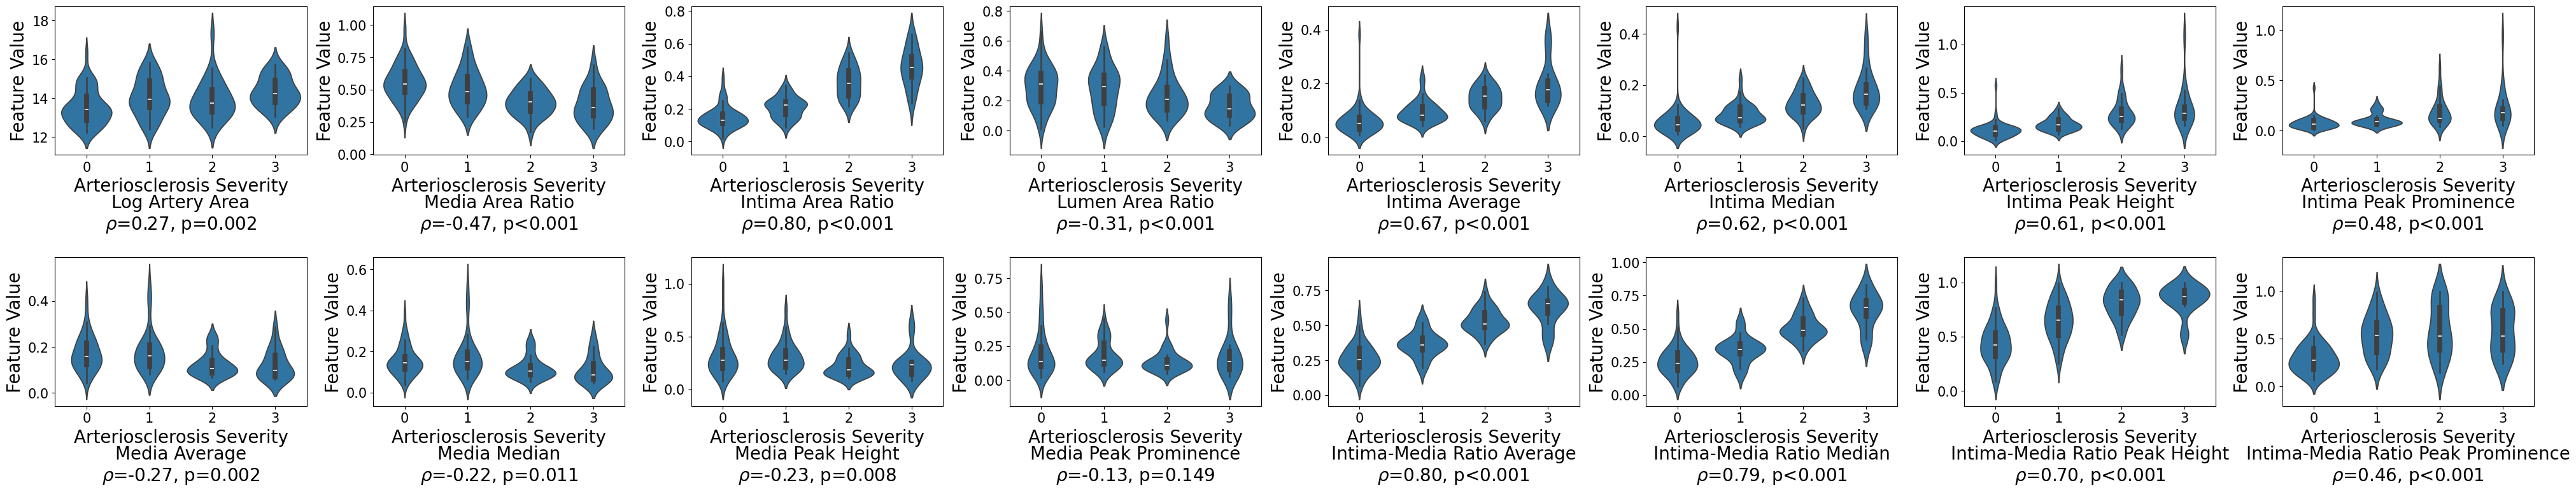

In [7]:
disease_type = "Arteriosclerosis"
selected_features_by_type = {}

selected_features = base_feature_names + measurement_feature_names
for artery_type in ARTERY_TYPES:
    print(artery_type)
    collected_features_selected = collected_features.loc[(collected_features["Artery Type"] == artery_type)]
    print(collected_features_selected.shape)

    collected_features_selected = collected_features_selected.dropna(subset=selected_features)
    print(collected_features_selected.shape)

    X = collected_features_selected.loc[:, selected_features].values
    y = collected_features_selected.loc[:, "Arteriosclerosis Severity"].values

    clf = DecisionTreeClassifier(random_state=0, max_depth=5)
    clf.fit(X, y)

    importances = clf.feature_importances_
    feature_importance_pairs = sorted(zip(selected_features, importances), key=lambda x: x[1], reverse=True)
    important_features = [f_name for f_name, importance in feature_importance_pairs if importance > 0.1]
    selected_features_by_type[artery_type] = set(important_features)

    # Print feature names in order of their importance
    print("Features sorted by importance:")
    for i, (feature, importance) in enumerate(feature_importance_pairs):
        if i < 5:
            print(f"{feature}: {importance:.3f}")
    fig, axs = plt.subplots(2, len(selected_features) // 2, figsize=(5 * len(selected_features) // 2, 8))
    for i, feature_name in enumerate(selected_features):
        # Calculate row and column index for axs
        row = i // (len(selected_features) // 2)  # Integer division to determine the row
        col = i % (len(selected_features) // 2)   # Modulo operation to determine the column within the row

        violin_plots(collected_features_selected, feature_name, disease_type, axs[row, col], artery_type) 

    plt.tight_layout()
    plt.show()

Arterioles
Interlobular Arteries
Arcuate Arteries


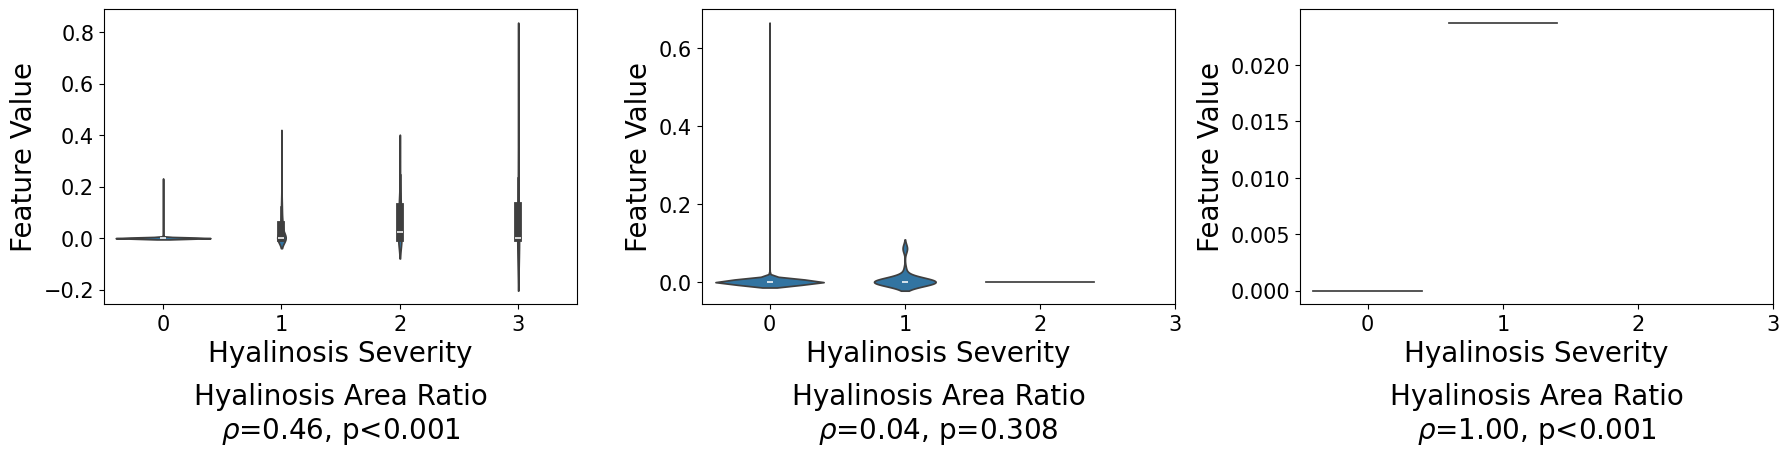

In [8]:
disease_type = "Hyalinosis"

selected_feature = hya_feature_name
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, artery_type in enumerate(ARTERY_TYPES):
    print(artery_type)
    disease_type = "Hyalinosis"
    collected_features_selected = collected_features.loc[(collected_features["Artery Type"] == artery_type)]
    collected_features_selected = collected_features_selected.dropna(subset=[selected_feature])
    violin_plots(collected_features_selected, selected_feature, disease_type, axs[i], artery_type)

plt.tight_layout()
plt.show()

In [9]:
selected_features_by_type["Arterioles"].add("Hyalinosis Area Ratio")
selected_features_by_type

{'Arterioles': {'Hyalinosis Area Ratio',
  'Intima Area Ratio',
  'Intima Median',
  'Log Artery Area',
  'Lumen Area Ratio'},
 'Interlobular Arteries': {'Intima Area Ratio', 'Ratio Average'},
 'Arcuate Arteries': {'Intima Area Ratio', 'Ratio Median'}}

In [10]:
pat_df = pd.read_csv(VESSEL_PAT_INFO_W_SCORE_PATH)
feature_path = FEATURES_PATH.replace(".xlsx", f"{suffix}.xlsx")

agg_feature_path = VESSEL_PAT_INFO_W_SCORE_W_FEATURE_PATH.replace(".csv", f"{suffix}.csv")

available_sheetnames = pd.ExcelFile(feature_path, engine='openpyxl').sheet_names
logging.info(f"{len(pat_df)} slides selected, {len(pat_df) - len(available_sheetnames)} discarded, " 
            f"{len(available_sheetnames)} left for analysis.")

for i, (index, row) in enumerate(pat_df.iterrows()):
    slide_filename = row["WSI_Selected"]
    logging.info(f"Processing: {i+1}/{len(pat_df)}: {slide_filename}")
    slide_basename = os.path.splitext(slide_filename)[0]
   
    # features = get_veesel_sheets(feature_path, slide_basename, available_sheetnames, remove_others=True)
    features = collected_features[collected_features["Slide Name"] == slide_basename]
    if features.empty:
        continue  # Skip to if no relevant data

    for artery_type in ARTERY_TYPES:
        for feature_name in selected_features_by_type[artery_type]:
            features_series = features[(features['Artery Type'] == artery_type)][feature_name]
            if not features_series.empty:            
                max_severity = features_series.max()
                mean_severity = features_series.mean()
                median_severity = features_series.median()
                percentile_75th = features_series.quantile(0.75)
                percentile_25th = features_series.quantile(0.25)
            else:
                max_severity = mean_severity = median_severity = percentile_75th = percentile_25th =  None  # or another indicator for no data

            # Storing these values in the DataFrame
            pat_df.loc[index, f'Max_{feature_name}_in_{artery_type}'.replace(" ", "_")] = max_severity
            pat_df.loc[index, f'Mean_{feature_name}_in_{artery_type}'.replace(" ", "_")] = mean_severity
            pat_df.loc[index, f'Median_{feature_name}_in_{artery_type}'.replace(" ", "_")] = median_severity
            pat_df.loc[index, f'75th_{feature_name}_in_{artery_type}'.replace(" ", "_")] = percentile_75th
            pat_df.loc[index, f'25th_{feature_name}_in_{artery_type}'.replace(" ", "_")] = percentile_25th

pat_df.to_csv(agg_feature_path, index=False)

2024-10-04 07:15:01,350 - INFO - 247 slides selected, 15 discarded, 232 left for analysis.
2024-10-04 07:15:01,359 - INFO - Processing: 1/247: 10_26609_000_002_L2_TRI.svs
2024-10-04 07:15:01,393 - INFO - Processing: 2/247: 11_26609_000_009_L2_TRI.svs
2024-10-04 07:15:01,414 - INFO - Processing: 3/247: 11_26609_000_012_L02_TRI.svs
2024-10-04 07:15:01,432 - INFO - Processing: 4/247: 11_26609_000_013_L02 TRI.svs
2024-10-04 07:15:01,452 - INFO - Processing: 5/247: 0_784_A_0047801.svs
2024-10-04 07:15:01,487 - INFO - Processing: 6/247: 0_796_A_0047806.svs
2024-10-04 07:15:01,526 - INFO - Processing: 7/247: 0_800_A_0047811.svs
2024-10-04 07:15:01,545 - INFO - Processing: 8/247: 11_26609_000_503_L2_TRI.svs
2024-10-04 07:15:01,564 - INFO - Processing: 9/247: 11_26609_001_004 L7 TRI.ndpi
2024-10-04 07:15:01,581 - INFO - Processing: 10/247: 12_26609_001_011 LUNK5 TRI.ndpi
2024-10-04 07:15:01,582 - INFO - Processing: 11/247: 13_26609_001_013 LUNK1 TRI.ndpi
2024-10-04 07:15:01,603 - INFO - Process